In [574]:
import os
os.getcwd()
os.chdir('/work/Zachary.Labe/Data/SPEAR/SPEAR_MED/monthly/PRECT/')

In [575]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt         
from mpl_toolkits.basemap import Basemap 
import matplotlib.dates as mdates

import datetime as dt            
import xarray as xr
import cartopy.crs as ccrs 
from sklearn import preprocessing
import pandas as pd
import scipy.stats as stats

In [580]:
ds1_1= xr.open_dataset('PRECT_01_1921-2010.nc')
lat=ds1_1.lat.sel(lat=slice(0, 39))
lon=ds1_1.lon.sel(lon=slice(60, 99))
pr1_1= ds1_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds1_2= xr.open_dataset('PRECT_01_2011-2100.nc')
pr1_2= ds1_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr1= xr.merge([pr1_1.load(),pr1_2.load()],join='outer')
pr1=pr1.to_array()
pr1.time[1198]

<xarray.DataArray 'time' ()>
array(cftime.DatetimeJulian(2020, 12, 16, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)
Coordinates:
    time     object 2020-12-16 12:00:00
Attributes:
    long_name:       time
    cartesian_axis:  T
    calendar_type:   JULIAN
    bounds:          time_bnds

In [313]:
months= [4,5,6,7,8,9]
pr_monsoon1 = pr1.sel(time=np.isin(pr1.time.dt.month, months))
pr_year1= pr_monsoon1.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year1.lat))
weights.name = "weights"
pr_weighted1 = pr_year1.weighted(weights)
pr_avg1= pr_weighted1.mean(dim=('lat','lon'))
pr_avg1=pr_avg1.values*86400

In [314]:
#Ens2
ds2_1= xr.open_dataset('PRECT_02_1921-2010.nc')
pr2_1= ds2_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds2_2= xr.open_dataset('PRECT_02_2011-2100.nc')
pr2_2= ds2_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr2= xr.merge([pr2_1.load(),pr2_2.load()],join='outer')
pr2=pr2.to_array()

In [315]:
pr_monsoon2 = pr2.sel(time=np.isin(pr2.time.dt.month, months))
pr_year2= pr_monsoon2.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year2.lat))
weights.name = "weights"
pr_weighted2 = pr_year2.weighted(weights)
pr_avg2= pr_weighted2.mean(dim=('lat','lon'))
pr_avg2=pr_avg2.values*86400

In [316]:
#Ens3
ds3_1= xr.open_dataset('PRECT_03_1921-2010.nc')
pr3_1= ds3_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds3_2= xr.open_dataset('PRECT_03_2011-2100.nc')
pr3_2= ds3_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr3= xr.merge([pr3_1.load(),pr3_2.load()],join='outer')
pr3=pr3.to_array()


In [317]:
pr_monsoon3 = pr3.sel(time=np.isin(pr3.time.dt.month, months))
pr_year3= pr_monsoon3.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year3.lat))
weights.name = "weights"
pr_weighted3 = pr_year3.weighted(weights)
pr_avg3= pr_weighted3.mean(dim=('lat','lon'))
pr_avg3=pr_avg3.values*86400

In [318]:
#Ens4
ds4_1= xr.open_dataset('PRECT_04_1921-2010.nc')
pr4_1= ds4_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds4_2= xr.open_dataset('PRECT_04_2011-2100.nc')
pr4_2= ds4_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr4= xr.merge([pr4_1.load(),pr4_2.load()],join='outer')
pr4=pr4.to_array()


In [319]:
pr_monsoon4 = pr4.sel(time=np.isin(pr4.time.dt.month, months))
pr_year4= pr_monsoon4.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year4.lat))
weights.name = "weights"
pr_weighted4 = pr_year4.weighted(weights)
pr_avg4= pr_weighted4.mean(dim=('lat','lon'))
pr_avg4=pr_avg4.values*86400

In [320]:
#Ens5
ds5_1= xr.open_dataset('PRECT_05_1921-2010.nc')
pr5_1= ds5_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds5_2= xr.open_dataset('PRECT_05_2011-2100.nc')
pr5_2= ds5_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr5= xr.merge([pr5_1.load(),pr5_2.load()],join='outer')
pr5=pr5.to_array()

In [321]:
pr_monsoon5 = pr5.sel(time=np.isin(pr5.time.dt.month, months))
pr_year5= pr_monsoon5.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year5.lat))
weights.name = "weights"
pr_weighted5 = pr_year5.weighted(weights)
pr_avg5= pr_weighted5.mean(dim=('lat','lon'))
pr_avg5=pr_avg5.values*86400

In [322]:
#Ens6
ds6_1= xr.open_dataset('PRECT_06_1921-2010.nc')
pr6_1= ds6_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds6_2= xr.open_dataset('PRECT_06_2011-2100.nc')
pr6_2= ds6_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr6= xr.merge([pr6_1.load(),pr6_2.load()],join='outer')
pr6=pr6.to_array()

In [323]:
pr_monsoon6 = pr6.sel(time=np.isin(pr6.time.dt.month, months))
pr_year6= pr_monsoon6.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year6.lat))
weights.name = "weights"
pr_weighted6 = pr_year6.weighted(weights)
pr_avg6= pr_weighted6.mean(dim=('lat','lon'))
pr_avg6=pr_avg6.values*86400

In [324]:
#Ens7
ds7_1= xr.open_dataset('PRECT_07_1921-2010.nc')
pr7_1= ds7_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds7_2= xr.open_dataset('PRECT_07_2011-2100.nc')
pr7_2= ds7_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr7= xr.merge([pr7_1.load(),pr7_2.load()],join='outer')
pr7=pr7.to_array()

In [325]:
pr_monsoon7 = pr7.sel(time=np.isin(pr7.time.dt.month, months))
pr_year7= pr_monsoon7.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year7.lat))
weights.name = "weights"
pr_weighted7 = pr_year7.weighted(weights)
pr_avg7= pr_weighted7.mean(dim=('lat','lon'))
pr_avg7=pr_avg7.values*86400

In [326]:
#Ens8
ds8_1= xr.open_dataset('PRECT_08_1921-2010.nc')
pr8_1= ds8_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds8_2= xr.open_dataset('PRECT_08_2011-2100.nc')
pr8_2= ds8_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr8= xr.merge([pr8_1.load(),pr8_2.load()],join='outer')
pr8=pr8.to_array()

In [327]:
pr_monsoon8 = pr8.sel(time=np.isin(pr8.time.dt.month, months))
pr_year8= pr_monsoon8.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year8.lat))
weights.name = "weights"
pr_weighted8 = pr_year8.weighted(weights)
pr_avg8= pr_weighted8.mean(dim=('lat','lon'))
pr_avg8=pr_avg8.values*86400

In [328]:
#Ens9
ds9_1= xr.open_dataset('PRECT_09_1921-2010.nc')
pr9_1= ds9_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds9_2= xr.open_dataset('PRECT_09_2011-2100.nc')
pr9_2= ds9_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr9= xr.merge([pr9_1.load(),pr9_2.load()],join='outer')
pr9=pr9.to_array()

In [329]:
pr_monsoon9 = pr9.sel(time=np.isin(pr9.time.dt.month, months))
pr_year9= pr_monsoon9.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year9.lat))
weights.name = "weights"
pr_weighted9 = pr_year9.weighted(weights)
pr_avg9= pr_weighted9.mean(dim=('lat','lon'))
pr_avg9=pr_avg9.values*86400

In [330]:
#Ens10
ds10_1= xr.open_dataset('PRECT_10_1921-2010.nc')
pr10_1= ds10_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds10_2= xr.open_dataset('PRECT_10_2011-2100.nc')
pr10_2= ds10_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr10= xr.merge([pr10_1.load(),pr10_2.load()],join='outer')
pr10=pr10.to_array()

In [331]:
pr_monsoon10 = pr10.sel(time=np.isin(pr10.time.dt.month, months))
pr_year10= pr_monsoon10.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year10.lat))
weights.name = "weights"
pr_weighted10 = pr_year10.weighted(weights)
pr_avg10= pr_weighted10.mean(dim=('lat','lon'))
pr_avg10=pr_avg10.values*86400

In [332]:
#Ens11
ds11_1= xr.open_dataset('PRECT_11_1921-2010.nc')
pr11_1= ds11_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds11_2= xr.open_dataset('PRECT_11_2011-2100.nc')
pr11_2= ds11_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr11= xr.merge([pr11_1.load(),pr11_2.load()],join='outer')
pr11=pr11.to_array()

In [333]:
pr_monsoon11 = pr11.sel(time=np.isin(pr11.time.dt.month, months))
pr_year11= pr_monsoon11.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year11.lat))
weights.name = "weights"
pr_weighted11 = pr_year11.weighted(weights)
pr_avg11= pr_weighted11.mean(dim=('lat','lon'))
pr_avg11=pr_avg11.values*86400

In [334]:
#Ens12
ds12_1= xr.open_dataset('PRECT_12_1921-2010.nc')
pr12_1= ds12_1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2010-12-01'))
ds12_2= xr.open_dataset('PRECT_12_2011-2100.nc')
pr12_2= ds12_2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('2011-01-01','2021-01-01'))
pr12= xr.merge([pr12_1.load(),pr12_2.load()],join='outer')
pr12=pr12.to_array()

In [335]:

pr_monsoon12 = pr12.sel(time=np.isin(pr12.time.dt.month, months))
pr_year12= pr_monsoon12.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year12.lat))
weights.name = "weights"
pr_weighted12 = pr_year12.weighted(weights)
pr_avg12= pr_weighted12.mean(dim=('lat','lon'))
pr_avg12=pr_avg12.values*86400

In [336]:
#Climatology
pr_med= (pr_monsoon1+pr_monsoon2+pr_monsoon3+pr_monsoon4+pr_monsoon5+pr_monsoon6+pr_monsoon7+pr_monsoon8+pr_monsoon9+pr_monsoon10+pr_monsoon11+pr_monsoon12)/12

In [337]:
pr_med_timeslice= pr_med.loc[:,'1941-01-01':'1980-12-01',: ,]



In [338]:
pr_med_ens= np.mean(pr_med_timeslice,axis=(0,1))


In [339]:
pr_med_ens=pr_med_ens.values*86400

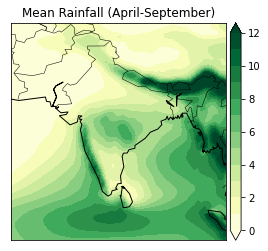

In [340]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat))

x, y = m(*np.meshgrid(lon, lat))

cs = m.contourf(x, y, pr_med_ens,np.arange(0,13,1),cmap=plt.cm.YlGn,extend='both')
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
plt.title('Mean Rainfall (April-September)')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "SPEAR_MED monthly_(1941-1980).png",dpi=300)

In [341]:
pr_med_timeslice2= pr_med.loc[:,'1981-01-01':'2020-12-01',: ,]
pr_med_ens2= np.mean(pr_med_timeslice2,axis=(0,1))
pr_med_ens2=pr_med_ens2.values*86400
pr_med_diff= pr_med_ens2 -pr_med_ens



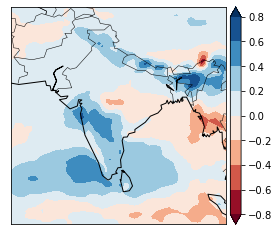

In [342]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat))

x, y = m(*np.meshgrid(lon, lat))

cs = m.contourf(x, y, pr_med_diff, np.arange(-0.8,1,0.2),cmap=plt.cm.RdBu,extend='both')
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)

directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Difference in monsoon precip (SPEAR_MED).png",dpi=300)

In [343]:
peak= [7,8]
year1= list(range(1961,1990,1))
year2=list(range(1991,2020,1))
pr_med_peak= pr_med.sel(time=np.isin(pr_med.time.dt.month, peak))
pr_med_timeslice_pk1= pr_med_peak.sel(time=np.isin(pr_med_peak.time.dt.year,year1))
pr_med_timeslice_pk2= pr_med_peak.sel(time=np.isin(pr_med_peak.time.dt.year,year2))

In [344]:

pr_med_pk1= np.mean(pr_med_timeslice_pk1,axis=(0,1))
pr_med_pk1= pr_med_pk1.values*86400
pr_med_pk_diff= np.mean(pr_med_timeslice_pk2,axis=(0,1)) - np.mean(pr_med_timeslice_pk1,axis=(0,1))
pr_med_pk_diff= pr_med_pk_diff.values*86400

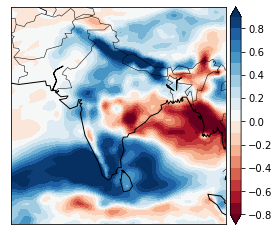

In [345]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat))

x, y = m(*np.meshgrid(lon, lat))

cs = m.contourf(x, y, pr_med_pk_diff,np.arange(-0.8,1,0.1), cmap=plt.cm.RdBu,extend='both')
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Difference in peak monsoon precip (SPEAR_MED).png",dpi=300)

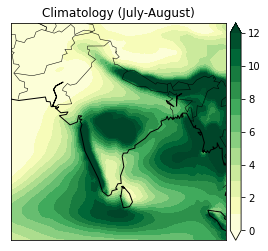

In [346]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat))

x, y = m(*np.meshgrid(lon, lat))

cs = m.contourf(x, y, pr_med_pk1,np.arange(0,13,1),cmap=plt.cm.YlGn,extend='both')
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
plt.title('Climatology (July-August)')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "SPEAR_MED Peak Months Climatology(1961-1990).png",dpi=300)

In [347]:
cyear= list(range(1981,2011,1))

In [348]:
pr_timeseries= pr_med.sel(time=np.isin(pr_med.time.dt.year, cyear))
pr_year= pr_timeseries.groupby('time.year').mean(dim='time')
weights = np.cos(np.deg2rad(pr_year.lat))
weights.name = "weights"
pr_weighted = pr_year.weighted(weights)
pr_avg= pr_weighted.mean(dim=('lat','lon'))
pr_anom= pr_avg - pr_avg.mean()

In [349]:
pr_anom = pr_anom.values*86400

In [350]:
pr_anom

array([[-0.05602025, -0.07321653, -0.23923827, -0.04500114, -0.01963181,
        -0.18937132, -0.00043109, -0.10099465, -0.1177034 ,  0.00896645,
        -0.06131781, -0.16428079,  0.03172802, -0.00601814, -0.11705203,
         0.01326606,  0.05876174,  0.02729729,  0.11847232,  0.02638293,
        -0.04435021,  0.15443468,  0.07447572,  0.12183009,  0.14920194,
         0.13605273,  0.10018603,  0.14452607,  0.03764481,  0.03140053]])

In [351]:
pr_anom_df= pd.DataFrame(pr_anom.tolist())
pr_anom_df= pr_anom_df.transpose()
directory= '/home/Tasmeem.Meem/Research/Timeseries/'
pr_anom_df.to_csv(directory+ 'anomaly_SPEAR_MED_1981-2010.csv')

In [352]:
pr_all_year= (pr1+pr2+pr3+pr4+pr5+pr6+pr7+pr8+pr9+pr10+pr11+pr12)/12
pr_all_timeslice= pr_all_year.loc[:,'1979-01-01':'2021-01-01',: ,]

In [353]:
pr_month= pr_all_timeslice.groupby('time.month').mean(dim='time')
pr_month= pr_month.weighted(weights)
pr_month_avg= pr_month.mean(dim=('lat','lon'))
pr_month_anom= pr_month_avg - pr_month_avg.mean()
pr_month_anom= pr_month_anom.values*86400


In [354]:
pr_month_anom_df= pd.DataFrame(pr_month_anom.tolist())
pr_month_anom_df= pr_month_anom_df.transpose()

pr_month_anom_df.to_csv(directory+ 'Monthly_anomaly_SPEAR.csv')

In [355]:
os.chdir('/work/Zachary.Labe/Data/SPEAR/SPEAR_MED_NOAER/monthly/PRECT')

In [356]:
#NO_AER1
ds_na1= xr.open_dataset('PRECT_01_1921-2020.nc')
lat=ds_na1.lat.sel(lat=slice(0, 39))
lon=ds_na1.lon.sel(lon=slice(60, 99))
pr_na_1= ds_na1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))



In [357]:
#NO_AER2
ds_na2= xr.open_dataset('PRECT_02_1921-2020.nc')
pr_na_2= ds_na2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))


In [358]:
#NO_AER3
ds_na3= xr.open_dataset('PRECT_03_1921-2020.nc')
pr_na_3= ds_na3.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [359]:
#NO_AER4
ds_na4= xr.open_dataset('PRECT_04_1921-2020.nc')
pr_na_4= ds_na4.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [360]:
#NO_AER5
ds_na5= xr.open_dataset('PRECT_05_1921-2020.nc')
pr_na_5= ds_na5.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [361]:
#NO_AER6
ds_na6= xr.open_dataset('PRECT_06_1921-2020.nc')
pr_na_6= ds_na6.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [362]:
#NO_AER7
ds_na7= xr.open_dataset('PRECT_07_1921-2020.nc')
pr_na_7= ds_na7.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [363]:
#NO_AER8
ds_na8= xr.open_dataset('PRECT_08_1921-2020.nc')
pr_na_8= ds_na8.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [364]:
#NO_AER9
ds_na9= xr.open_dataset('PRECT_09_1921-2020.nc')
pr_na_9= ds_na9.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [365]:
#NO_AER10
ds_na10= xr.open_dataset('PRECT_10_1921-2020.nc')
pr_na_10= ds_na10.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [366]:
#NO_AER11
ds_na11= xr.open_dataset('PRECT_11_1921-2020.nc')
pr_na_11= ds_na11.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [367]:
#NO_AER12
ds_na12= xr.open_dataset('PRECT_12_1921-2020.nc')
pr_na_12= ds_na12.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2021-01-01'))

In [368]:
pr_na= (pr_na_1+pr_na_2+pr_na_3+pr_na_4+pr_na_5+pr_na_6+pr_na_7+pr_na_8+pr_na_9+pr_na_10+pr_na_11+pr_na_12)/12

In [369]:
pr_aer= pr_all_year - pr_na

In [370]:
pr_aer_monsoon= pr_aer.sel(time=np.isin(pr11.time.dt.month, months))
pr_aer_monsoon1= pr_aer_monsoon.sel(time=np.isin(pr_aer_monsoon.time.dt.year, year1))
pr_aer_monsoon2= pr_aer_monsoon.sel(time=np.isin(pr_aer_monsoon.time.dt.year, year2))


In [371]:
pr_aer_monsoon_pk= pr_aer.sel(time=np.isin(pr_aer.time.dt.month, peak))
pr_aer_monsoon1_pk= pr_aer_monsoon_pk.sel(time=np.isin(pr_aer_monsoon_pk.time.dt.year, year1))
pr_aer_monsoon2_pk= pr_aer_monsoon_pk.sel(time=np.isin(pr_aer_monsoon_pk.time.dt.year, year2))
pr_aer_monsoon1_pk_mn= np.mean(pr_aer_monsoon1_pk,axis=(0,1))
pr_aer_monsoon2_pk_mn= np.mean(pr_aer_monsoon2_pk,axis=(0,1))
pr_aer_diff = (pr_aer_monsoon2_pk_mn - pr_aer_monsoon1_pk_mn)*86400


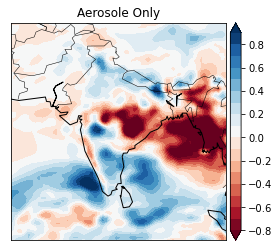

In [372]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat))

x, y = m(*np.meshgrid(lon, lat))

cs = m.contourf(x, y, pr_aer_diff, np.arange(-0.8,1,0.1),cmap=plt.cm.RdBu,extend='both')
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
plt.title('Aerosole Only')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Changes in Peak Rainfall Aerosole",dpi=300)

In [373]:
#Natural
os.chdir('/work/Zachary.Labe/Data/SPEAR/SPEAR_MED_NATURAL/monthly/PRECT')

In [374]:
#1
ds_nat1= xr.open_dataset('PRECT_01_1921-2100.nc')
lat=ds_nat1.lat.sel(lat=slice(0, 39))
lon=ds_nat1.lon.sel(lon=slice(60, 99))
pr_nat_1= ds_nat1.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [375]:
#2
ds_nat2= xr.open_dataset('PRECT_02_1921-2100.nc')
lat=ds_nat2.lat.sel(lat=slice(0, 39))
lon=ds_nat2.lon.sel(lon=slice(60, 99))
pr_nat_2= ds_nat2.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [376]:
#3
ds_nat3= xr.open_dataset('PRECT_03_1921-2100.nc')
pr_nat_3= ds_nat3.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [377]:
#4
ds_nat4= xr.open_dataset('PRECT_04_1921-2100.nc')
pr_nat_4= ds_nat4.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [378]:
#5
ds_nat5= xr.open_dataset('PRECT_05_1921-2100.nc')
pr_nat_5= ds_nat5.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [379]:
#6
ds_nat6= xr.open_dataset('PRECT_06_1921-2100.nc')
pr_nat_6= ds_nat6.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [380]:
#7
ds_nat7= xr.open_dataset('PRECT_07_1921-2100.nc')
pr_nat_7= ds_nat7.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [381]:
#8
ds_nat8= xr.open_dataset('PRECT_08_1921-2100.nc')
pr_nat_8= ds_nat8.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [382]:
#9
ds_nat9= xr.open_dataset('PRECT_09_1921-2100.nc')
pr_nat_9= ds_nat9.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [383]:
#10
ds_nat10= xr.open_dataset('PRECT_10_1921-2100.nc')
pr_nat_10= ds_nat10.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [384]:
#11
ds_nat11= xr.open_dataset('PRECT_11_1921-2100.nc')
pr_nat_11= ds_nat11.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [385]:
#12
ds_nat12= xr.open_dataset('PRECT_12_1921-2100.nc')
pr_nat_12= ds_nat12.PRECT.sel(lat=slice(0, 39), lon=slice(60, 99), time=slice('1921-01-01','2100-12-01'))

In [386]:
pr_nat= (pr_nat_1+pr_nat_2+pr_nat_3+pr_nat_4+pr_nat_5+pr_nat_6+pr_nat_7+pr_nat_8+pr_nat_9+pr_nat_10+pr_nat_11+pr_nat_12)/12

In [387]:
pr_ghg= pr_na - pr_nat

In [388]:
pr_ghg_monsoon_pk= pr_ghg.sel(time=np.isin(pr_ghg.time.dt.month, peak))
pr_ghg_monsoon1_pk= pr_ghg_monsoon_pk.sel(time=np.isin(pr_ghg_monsoon_pk.time.dt.year, year1))
pr_ghg_monsoon2_pk= pr_ghg_monsoon_pk.sel(time=np.isin(pr_ghg_monsoon_pk.time.dt.year, year2))
pr_ghg_monsoon1_pk_mn= np.mean(pr_ghg_monsoon1_pk,axis=0)
pr_ghg_monsoon2_pk_mn= np.mean(pr_ghg_monsoon2_pk,axis=0)
pr_ghg_diff = (pr_ghg_monsoon2_pk_mn - pr_ghg_monsoon1_pk_mn)*86400

In [389]:
pr_ghg_diff

<xarray.DataArray 'PRECT' (lat: 78, lon: 62)>
array([[ 2.95754190e-01,  3.00506847e-01,  2.77945782e-01, ...,
         2.25820332e-02,  1.78616556e-02, -6.42070399e-02],
       [ 2.80484438e-01,  3.01746039e-01,  3.74299622e-01, ...,
         1.11076005e-01, -1.08484386e-02, -1.20985438e-01],
       [ 2.70535990e-01,  3.59742221e-01,  5.34820009e-01, ...,
         1.55295560e-01, -2.69255543e-04, -3.51220419e-01],
       ...,
       [-2.02097007e-03, -7.54314499e-04, -4.15672514e-04, ...,
         5.37201740e-03, -5.23050403e-04,  1.40060080e-02],
       [-1.95238508e-03, -1.24190775e-03, -6.25603889e-04, ...,
         5.90549542e-02,  5.74606180e-02,  4.55664813e-02],
       [-1.16300180e-03, -1.08401935e-03, -8.45058142e-04, ...,
         4.16154911e-02,  3.92263983e-02,  3.26953355e-02]])
Coordinates:
  * lat      (lat) float64 0.25 0.75 1.25 1.75 2.25 ... 37.25 37.75 38.25 38.75
  * lon      (lon) float64 60.31 60.94 61.56 62.19 ... 96.56 97.19 97.81 98.44

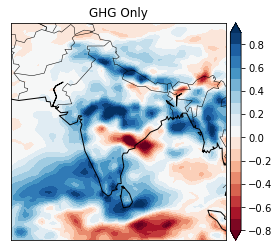

In [390]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat))

x, y = m(*np.meshgrid(lon, lat))

cs = m.contourf(x, y, pr_ghg_diff,np.arange(-0.8,1,0.1), cmap=plt.cm.RdBu,extend='both')
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
plt.title('GHG Only')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Changes in Peak Rainfall GHG",dpi=300)

In [391]:
#Anthropogenic (GHG+AER)
pr_anthro = pr_all_year - pr_nat

In [392]:
pr_anthro_monsoon_pk= pr_anthro.sel(time=np.isin(pr_anthro.time.dt.month, peak))
pr_anthro_monsoon1_pk= pr_anthro_monsoon_pk.sel(time=np.isin(pr_anthro_monsoon_pk.time.dt.year, year1))
pr_anthro_monsoon2_pk= pr_anthro_monsoon_pk.sel(time=np.isin(pr_anthro_monsoon_pk.time.dt.year, year2))
pr_anthro_monsoon1_pk_mn= np.mean(pr_anthro_monsoon1_pk,axis=(0,1))
pr_anthro_monsoon2_pk_mn= np.mean(pr_anthro_monsoon2_pk,axis=(0,1))
pr_anthro_diff = (pr_anthro_monsoon2_pk_mn - pr_anthro_monsoon1_pk_mn)*86400

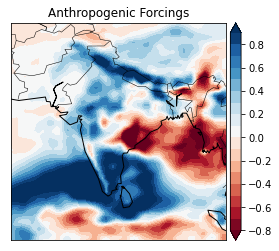

In [393]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat))

x, y = m(*np.meshgrid(lon, lat))

cs = m.contourf(x, y, pr_anthro_diff,np.arange(-0.8,1,0.1), cmap=plt.cm.RdBu,extend='both')
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
plt.title('Anthropogenic Forcings')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Changes in Peak Rainfall (AER+GHG)",dpi=300)

In [394]:
ens1= pd.DataFrame(pr_avg1.tolist())
ens1= ens1.transpose()
ens1.columns = ["Ens1"]
ens2= pd.DataFrame(pr_avg2.tolist())
ens2= ens2.transpose()
ens2.columns = ["Ens2"]
ens3= pd.DataFrame(pr_avg3.tolist())
ens3= ens3.transpose()
ens3.columns = ["Ens3"]
ens4= pd.DataFrame(pr_avg4.tolist())
ens4= ens4.transpose()
ens4.columns = ["Ens4"]
ens5= pd.DataFrame(pr_avg5.tolist())
ens5= ens5.transpose()
ens5.columns = ["Ens5"]
ens6= pd.DataFrame(pr_avg6.tolist())
ens6= ens6.transpose()
ens6.columns = ["Ens6"]
ens7= pd.DataFrame(pr_avg7.tolist())
ens7= ens7.transpose()
ens7.columns = ["Ens7"]
ens8= pd.DataFrame(pr_avg8.tolist())
ens8= ens8.transpose()
ens8.columns = ["Ens8"]
ens9= pd.DataFrame(pr_avg9.tolist())
ens9= ens9.transpose()
ens9.columns = ["Ens9"]
ens10= pd.DataFrame(pr_avg10.tolist())
ens10= ens10.transpose()
ens10.columns = ["Ens10"]
ens11= pd.DataFrame(pr_avg11.tolist())
ens11= ens11.transpose()
ens11.columns = ["Ens11"]
ens12= pd.DataFrame(pr_avg12.tolist())
ens12= ens12.transpose()
ens12.columns = ["Ens12"]



In [395]:
ens_all= pd.concat([ens1,ens2,ens3,ens4,ens5,ens6,ens7,ens8,ens9,ens10,ens11,ens12],axis=1)

In [396]:
ens_all['year']= list(range(1921,2021,1))

In [397]:
ens_melt= pd.melt(ens_all, id_vars=['year'], value_vars=['Ens1', 'Ens2','Ens3','Ens4','Ens5','Ens6','Ens7','Ens8','Ens9','Ens10','Ens11','Ens12'], ignore_index=False)

In [398]:
clm= list(range(1981,2011,1))
ens_melt_ts= ens_melt[ens_melt.year.isin(clm)]
ens_melt_ts

,year,variable,value
60,1981,Ens1,4.460928
61,1982,Ens1,3.996164
62,1983,Ens1,4.322307
63,1984,Ens1,4.405718
64,1985,Ens1,4.681620
...,...,...,...
85,2006,Ens12,4.628227
86,2007,Ens12,4.162189
87,2008,Ens12,5.059562
88,2009,Ens12,4.767243


In [399]:

ens_melt_ts= ens_melt_ts.assign(
    mean_val = 
    ens_melt_ts
    .groupby(["variable"])
    .value
    .transform('mean')
)
ens_melt_ts['anomaly']= ens_melt_ts['value'] - ens_melt_ts['mean_val']


In [400]:
ens_min_anom= ens_melt_ts.groupby(['year']).anomaly.min()
ens_max_anom= ens_melt_ts.groupby(['year']).anomaly.max()

In [477]:
directory= '/home/Tasmeem.Meem/Research/Timeseries/'
ens_min_anom.to_csv(directory+'minimum anomaly_SPEAR_MED_1981-2010.csv')
ens_max_anom.to_csv(directory+'maximum anomaly_SPEAR_MED_1981-2010.csv')

In [718]:
pr_ghg_timeslice= pr_ghg.loc['1991-01-01':'2020-12-30',: ,]
pr_ghg_timeslice= pr_ghg_timeslice.sel(time=np.isin(pr_ghg_timeslice.time.dt.month,months))


In [719]:
pr_ghg_timeslice

<xarray.DataArray 'PRECT' (time: 180, lat: 78, lon: 62)>
array([[[ 1.24850230e-05,  1.07381420e-05,  8.35466199e-06, ...,
          9.08597576e-06,  1.78112605e-05,  2.06279074e-05],
        [ 1.08894965e-05,  1.26308914e-05,  1.23590798e-05, ...,
          1.72904693e-05,  2.76631908e-05,  2.98721425e-05],
        [ 7.04439663e-06,  1.12530943e-05,  9.64413266e-06, ...,
          2.43650138e-05,  3.27323069e-05,  3.83289735e-05],
        ...,
        [-2.36834603e-06, -8.13471161e-07, -7.09069354e-08, ...,
          2.98631039e-06,  3.16100704e-06,  3.51894050e-06],
        [-3.25722704e-06, -2.40339523e-06, -2.01671719e-06, ...,
          2.67401265e-06,  2.36903452e-06,  2.19622598e-06],
        [-3.66984750e-07, -2.61628520e-06, -3.65505457e-06, ...,
          1.91634899e-06,  1.97867848e-06,  1.42063072e-06]],

       [[ 1.32954592e-05,  2.12430314e-06,  1.10155815e-06, ...,
          2.78048974e-05,  2.40727240e-05,  2.96037106e-05],
        [ 1.66106547e-05,  8.87925125e-06, -2.48542347e-06, ...,
          3.26240697e-05,  2.74124905e-05,  2.49697841e-05],
        [ 6.32918818e-06, -5.08715311e-06, -1.70138883e-05, ...,
          3.00383399e-05,  2.23931493e-05,  1.98708294e-05],
...
         -3.00845750e-06, -6.24020686e-06, -8.84206383e-06],
        [-1.41463508e-10, -2.66871664e-10, -3.50137752e-10, ...,
         -2.25500844e-06, -5.81187851e-06, -8.50100332e-06],
        [-1.56343993e-09, -2.86258373e-09, -2.85829449e-09, ...,
         -2.29240686e-06, -5.07270124e-06, -7.28370287e-06]],

       [[-1.49787084e-05, -8.58887870e-06,  4.80408926e-06, ...,
          1.95442553e-05,  9.60782927e-06, -1.04086939e-06],
        [-1.30717563e-05, -7.65300501e-06,  5.32818376e-06, ...,
          1.42007993e-05,  2.79140659e-06, -2.92970799e-06],
        [-1.31625893e-05, -7.15248825e-06,  4.84572956e-06, ...,
          1.04190985e-05,  1.32827699e-06, -3.04327114e-06],
        ...,
        [ 2.45234340e-08,  1.56803281e-09, -2.02989980e-09, ...,
          4.03122613e-06,  4.95865788e-06,  4.81493771e-06],
        [ 3.59129899e-08,  1.95263929e-08,  4.89519447e-09, ...,
          3.31150841e-06,  4.65000085e-06,  5.05517710e-06],
        [-3.73444209e-08, -2.55363908e-08, -1.67917733e-08, ...,
          9.42478437e-07,  1.44875048e-06,  1.54223926e-06]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 0.25 0.75 1.25 1.75 2.25 ... 37.25 37.75 38.25 38.75
  * lon      (lon) float64 60.31 60.94 61.56 62.19 ... 96.56 97.19 97.81 98.44
  * time     (time) object 1991-04-16 00:00:00 ... 2020-09-16 00:00:00

In [720]:

pr_ghg_np= (pr_ghg_timeslice.to_numpy())
pr_ghg_np= pr_ghg_np*86400

In [721]:
nt,nlat,nlon = pr_ghg_np.shape
ngrd = nlon*nlat

In [722]:
nlat

78

In [723]:
pr_grd  = pr_ghg_np.reshape((nt, ngrd))
pr_grd.shape

(180, 4836)

In [724]:
pr_rate = np.empty((ngrd,1))
pr_rate[:,:] = np.nan
pr_val = np.empty((ngrd,1))
pr_val[:,:] = np.nan

In [725]:
for i in range(ngrd): 
    y = pr_grd[:,i]  
    y0 = y[~np.isnan(y)]    
   
    x = np.linspace(1,len(y0), len(y0))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y0)
    pr_rate[i,0] = slope*120.0  
    pr_val[i,0]  = p_value 
    
pr_rate = pr_rate.reshape((nlon,nlat), order='F')
pr_val  = pr_val.reshape((nlon,nlat), order='F')

#pr_rate_ms = np.ma.masked_array(pr_rate, mask=(pr_val<0.05))


In [726]:
  pr_val1.shape

(62, 78)

In [727]:
yy,xx=np.where(pr_val<0.05)
xx_list= xx.tolist()
yy_list=yy.tolist()
len(xx_list)
lat_np= lat.to_numpy()
lat_ls= lat_np.tolist()
lon_np=lon.to_numpy()
lon_ls= lon_np.tolist()

In [728]:
lat_list= []
for values in list(range(len(xx_list))):
    lat_list.append(lat_ls[xx_list[values]])
   
    

In [729]:
lon_list= []
for values in list(range(len(yy_list))):
    lon_list.append(lon_ls[yy_list[values]])
    
    

In [730]:
len(lon_list)

825

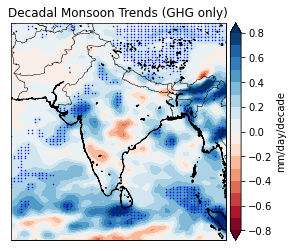

In [738]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat),resolution='h')

x, y = m(*np.meshgrid(lat,lon))

cs = m.contourf(y,x, pr_rate,np.arange(-0.8,0.9,0.1), cmap=plt.cm.RdBu,extend='both')
m.plot(lon_list,lat_list,'bo',markersize=0.5)
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
circle = m.drawmapboundary(fill_color='k',color='k',
                              linewidth=0.7)
circle.set_clip_on(False)

cb.set_label('mm/day/decade')
plt.title('Decadal Monsoon Trends (GHG only)')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Decadal Monsoon Trends in GHG Forcing (1991-2020).png",dpi=300)

In [733]:
pr_rate.max()


1.3157127061445124

In [734]:
pr_rate.min()

-0.5991983153297359

In [739]:
pr_med_timeslice= pr_all_year.loc[:,'1991-01-01':'2020-12-30',: ,]
pr_med_timeslice= pr_med_timeslice.sel(time=np.isin(pr_med_timeslice.time.dt.month,months))


In [740]:
pr_med_trend= pr_med_timeslice[0,:,:,]
pr_med_np=pr_med_trend.to_numpy()
pr_med_np= pr_med_np*86400
nt1,nlat1,nlon1 = pr_med_np.shape
ngrd1 = nlat1*nlon1
pr_grd1  = pr_med_np.reshape((nt1, ngrd1))

In [741]:
pr_rate1 = np.empty((ngrd1,1))
pr_rate1[:,:] = np.nan
pr_val1 = np.empty((ngrd1,1))
pr_val1[:,:] = np.nan
pr_rate1.shape

(4836, 1)

In [742]:
for i in range(ngrd1): 
    y = pr_grd1[:,i]  
    y0 = y[~np.isnan(y)]    
   
    x = np.linspace(1,len(y0), len(y0))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y0)
    pr_rate1[i,0] = slope*120.0  
    pr_val1[i,0]  = p_value 
    
pr_rate1 = pr_rate1.reshape((nlon,nlat), order='F')
pr_val1  = pr_val1.reshape((nlon,nlat), order='F')

In [743]:
yy1,xx1=np.where(pr_val1<0.05)
xx_list1= xx1.tolist()
yy_list1=yy1.tolist()
len(xx_list1)
lat_np= lat.to_numpy()
lat_ls= lat_np.tolist()
lon_np=lon.to_numpy()
lon_ls= lon_np.tolist()

In [744]:
lat_list1= []
for values in list(range(len(xx_list1))):
    lat_list1.append(lat_ls[xx_list1[values]])
    

In [745]:
lon_list1= []
for values in list(range(len(yy_list1))):
    lon_list1.append(lon_ls[yy_list1[values]])
    

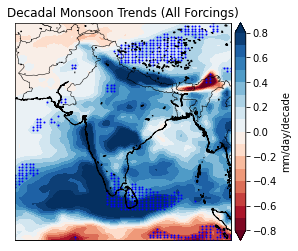

In [763]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat),resolution='h')

x, y = m(*np.meshgrid(lat,lon))
cs = m.contourf(y,x, pr_rate1.squeeze(),np.arange(-0.8,0.9,.1), cmap=plt.cm.RdBu,extend='both')
m.plot(lon_list1,lat_list1,'bo',markersize=1)
m.drawcoastlines()
m.drawcountries()
cb = m.colorbar(cs)
circle = m.drawmapboundary(fill_color='k',color='k',
                              linewidth=0.7)
circle.set_clip_on(False)
cb.set_label('mm/day/decade')
plt.title('Decadal Monsoon Trends (All Forcings)')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Decadal Monsoon Trends in All Forcing(1991-2020).png",dpi=300)

In [748]:
pr_rate1.min()

-1.7584051792792852

In [751]:
pr_aer_timeslice= pr_aer.loc[:,'1991-01-01':'2020-12-30',: ,]
pr_aer_timeslice= pr_aer_timeslice.sel(time=np.isin(pr_aer_timeslice.time.dt.month,months))
    

In [752]:
pr_aer_trend= pr_aer_timeslice[0,:,:,]
pr_aer_np=pr_aer_trend.to_numpy()
pr_aer_np= pr_aer_np*86400
nt2,nlat2,nlon2 = pr_aer_np.shape
ngrd2 = nlat2*nlon2
pr_grd2  = pr_aer_np.reshape((nt2, ngrd2))

In [753]:
pr_rate2 = np.empty((ngrd2,1))
pr_rate2[:,:] = np.nan
pr_val2 = np.empty((ngrd2,1))
pr_val2[:,:] = np.nan
pr_rate2.shape

(4836, 1)

In [754]:
for i in range(ngrd2): 
    y = pr_grd2[:,i]  
    y0 = y[~np.isnan(y)]    
   
    x = np.linspace(1,len(y0), len(y0))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y0)
    pr_rate2[i,0] = slope*120.0  
    pr_val2[i,0]  = p_value 
    
pr_rate2 = pr_rate2.reshape((nlon,nlat), order='F')
pr_val2 = pr_val2.reshape((nlon,nlat), order='F')

In [755]:
yy2,xx2=np.where(pr_val2<0.05)
xx_list2= xx2.tolist()
yy_list2=yy2.tolist()
len(xx_list2)
lat_np= lat.to_numpy()
lat_ls= lat_np.tolist()
lon_np=lon.to_numpy()
lon_ls= lon_np.tolist()

In [756]:
lat_list2= []
for values in list(range(len(xx_list2))):
    lat_list2.append(lat_ls[xx_list2[values]])

In [757]:
lon_list2= []
for values in list(range(len(yy_list2))):
    lon_list2.append(lon_ls[yy_list2[values]])

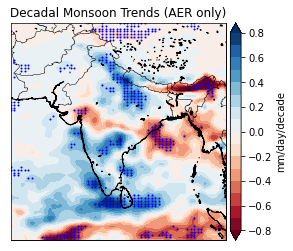

In [765]:
m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
        urcrnrlon=max(lon), urcrnrlat=max(lat),resolution='h')

x, y = m(*np.meshgrid(lat,lon))

import cmocean
#cmap = cmocean.cm.tarn_r
cmap = plt.cm.RdBu

cs = m.contourf(y,x, pr_rate2.squeeze(),np.arange(-0.8,0.9,0.1), cmap=cmap,extend='both')
m.plot(lon_list2,lat_list2,'bo',markersize=1)
m.drawcoastlines()
m.drawcountries()
circle = m.drawmapboundary(fill_color='k',color='k',
                              linewidth=0.7)
circle.set_clip_on(False)

plt.title('Decadal Monsoon Trends (AER only)')
cb = m.colorbar(cs)
cb.set_label('mm/day/decade')
directoryfigure = '/home/Tasmeem.Meem/Research/Figures/'
plt.savefig(directoryfigure + "Decadal Monsoon Trends in Aerosole Forcing (1991-2020).png",dpi=300)